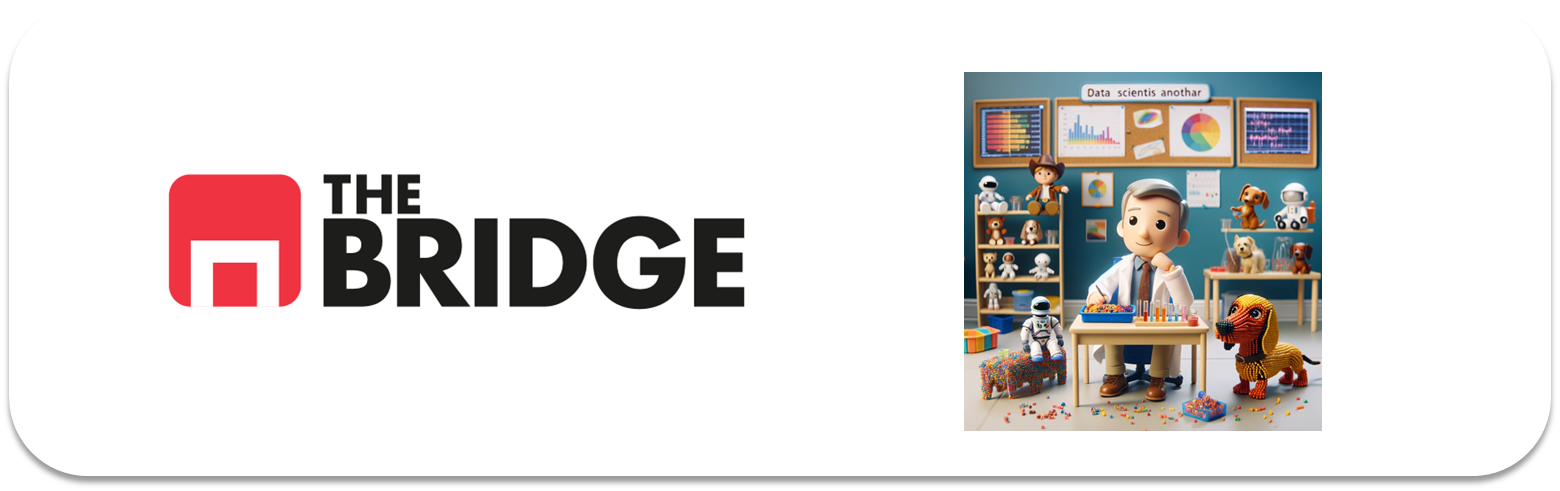

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from bootcampviztools import *




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [77]:
muestra = sns.get_dataset_names()
print(muestra)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [78]:
df_titanic = sns.load_dataset("titanic")


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [79]:
df_titanic.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [80]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [81]:
(df_titanic.isna().sum()/len(df_titanic)).round(2)

survived       0.00
pclass         0.00
sex            0.00
age            0.20
sibsp          0.00
parch          0.00
fare           0.00
embarked       0.00
class          0.00
who            0.00
adult_male     0.00
deck           0.77
embark_town    0.00
alive          0.00
alone          0.00
dtype: float64

In [82]:
# La columna "age", relleno con la media de edad
df_titanic["age"].fillna(value=df_titanic["age"].mean(),inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [83]:
# La colunma "deck" me la cargo dado que tiene muchos nulos y no puedo saber cómo rellenarla y aprovecho para eliminar también la columna "parch"
df_titanic.drop(["parch","deck"],axis = 1,inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [84]:
# La columna "embarked" y "embark_town" tienen dos nulos. Pero no voy a poder rellenarlos. Sin embargo, como han sobrevivido. Los mantengo.
df_titanic.loc[df_titanic["embarked"].isna()]

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,80.0,NaN,First,woman,False,NaN,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |Importancia|
| ---------------- | ----------- |----------|
| survived      | Indica si el pasajero sobrevivió al hundimiento del Titanic (1 si sobrevivió, 0 si no).           | 0|
| pclass        | Clase del billete del pasajero (1 para primera clase, 2 para segunda clase, 3 para tercera clase). |1|
| sex           | Género del pasajero (masculino o femenino).                                                         |0|
| age           | Edad del pasajero en años.                                                                         |0|
| sibsp         | Número de hermanos/cónyuges a bordo del Titanic.                                                   |2|
| fare          | Tarifa del pasaje pagada por el pasajero.                                                           |1|
| embarked      | Puerto de embarque del pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).                  |2|
| class         | Clase del billete del pasajero |1|
| who           | Categoría de edad del pasajero ("man", "woman" o "child").                                          |2|
| adult_male    | Indicador de si el pasajero es adulto y masculino (True o False).                                   |2|
| embark_town   | Nombre del puerto de embarque del pasajero (equivalente a `embarked` pero con nombres completos de la ciudad).|2|
| alive         | Estado de supervivencia del pasajero (equivale a `survived` pero con "yes" y "no").               |0|
| alone         | Indicador de si el pasajero viajaba solo o no (True o False).|1|                               



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [85]:
df_titanic["embarked"]=df_titanic["embarked"].replace("C","Cherbourg").replace("Q","Queenstown").replace("S","Southampton")
df_titanic["embarked"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [86]:
df_cardinalidad = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic) * 100]).T.rename(columns = {0: "Card",1: "%_Card"})
df_cardinalidad.round(2)

,Card,%_Card
survived,2.0,0.22
pclass,3.0,0.34
sex,2.0,0.22
age,89.0,9.99
sibsp,7.0,0.79
fare,248.0,27.83
embarked,3.0,0.34
class,3.0,0.34
who,3.0,0.34
adult_male,2.0,0.22


In [87]:
df_cardinalidad["Tipo"] = "Categorica" 
df_cardinalidad.loc[df_cardinalidad.Card == 2, "Tipo"] = "Binaria"
df_cardinalidad.loc[df_cardinalidad["%_Card"] > 10, "Tipo"] ="Numerica Discreta"
df_cardinalidad.loc[df_cardinalidad["%_Card"] > 30, "Tipo"] = "Numerica Continua"
df_cardinalidad

,Card,%_Card,Tipo
survived,2.0,0.224467,Binaria
pclass,3.0,0.336700,Categorica
sex,2.0,0.224467,Binaria
age,89.0,9.988777,Categorica
sibsp,7.0,0.785634,Categorica
fare,248.0,27.833895,Numerica Discreta
embarked,3.0,0.336700,Categorica
class,3.0,0.336700,Categorica
who,3.0,0.336700,Categorica
adult_male,2.0,0.224467,Binaria


___

#### Análisis variable: survived
- Variable binaria (0 para los que no sobrevivieron y 1 para los que sí)
- Variable importante de cara a tener en cuenta en el estudio

In [88]:

# Frecuencia absoluta
df_titanic["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [89]:
# frecuenca relativa
(df_titanic["survived"].value_counts()/df_titanic["survived"].count()*100).round(2)

survived
0    61.62
1    38.38
Name: count, dtype: float64

In [90]:
# Moda
df_titanic["survived"].mode()

0    0
Name: survived, dtype: int64

<Axes: >

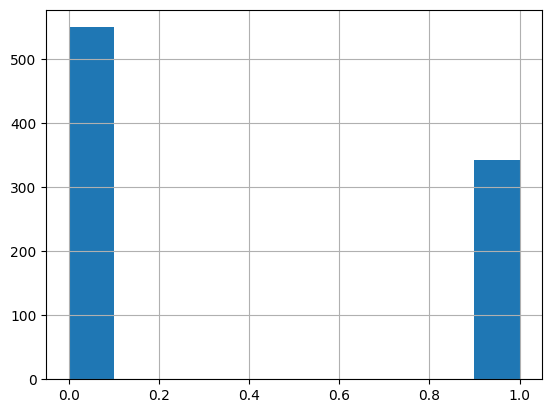

In [91]:
df_titanic["survived"].hist()

___

#### Análisis variable: who
- Variable categórica que nos informa sobre la categoría de edad del pasajero ("man", "woman" o "child")
- Variable considerada poco relevante de primeras de cara al estudio dado que hay otras que pueden darnos más información (age)

In [92]:
# Frecuencia absoluta
df_titanic["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [93]:
# frecuenca relativa
(df_titanic["who"].value_counts()/df_titanic["who"].count()*100).round(2)

who
man      60.27
woman    30.42
child     9.32
Name: count, dtype: float64

In [94]:
# Moda
df_titanic["who"].mode()

0    man
Name: who, dtype: object

<Axes: >

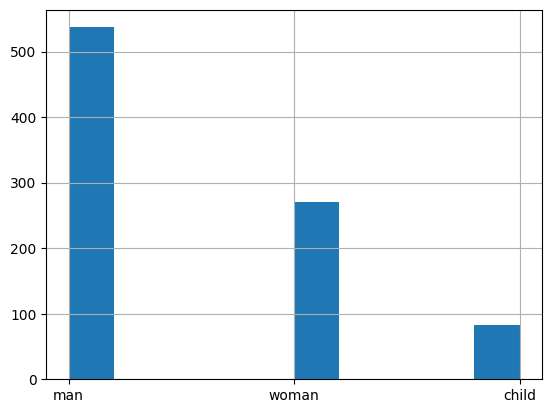

In [95]:
# Histograma
df_titanic["who"].hist()

___

#### Análisis variable: age
- Variable numérica que nos informa sobre la edad del pasajero en años
- Variable considerada muy relevante de primeras de cara al estudio 

In [96]:
# Valores máximos, minimos, cuartiles, desviación estándar y media
df_titanic["age"].describe().round(2)

count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: age, dtype: float64

In [97]:
# Mediana (coincide con la media)
df_titanic["age"].median().round(2)

29.7

In [98]:
# Rango IQR (intercuartílico q3 - q1)
df_titanic["age"].quantile(0.75) - df_titanic["age"].quantile(0.25)

13.0

In [99]:
# Rango entre máximo y mínimo
df_titanic["age"].describe().loc["max"] - df_titanic["age"].describe().loc["min"]

79.58

<Axes: >

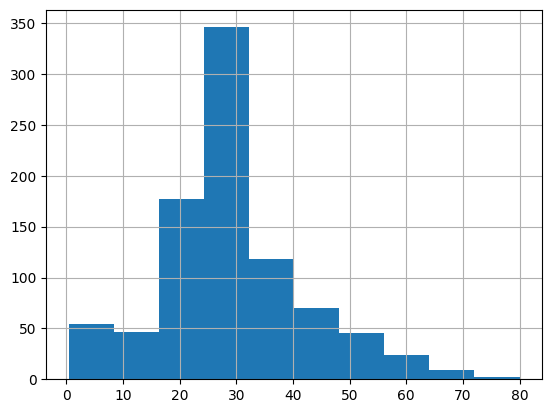

In [100]:
# Histograma
df_titanic["age"].hist()

(2,)


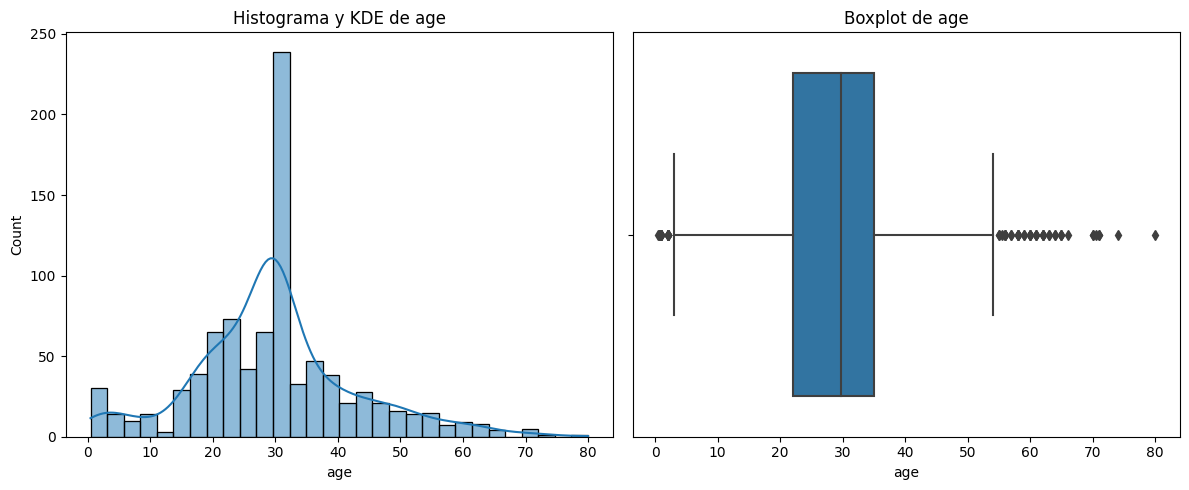

In [101]:
plot_combined_graphs(df_titanic,["age"])

Primeras conclusiones edad:
- La media se situa en 29 años con una desviación típida de 13 años
- El máximo de edad es de 80 y el mínimo de meses \(bebé\)
- El 75% del total de pasajeros está por debajo de 35 años y el 50% por debajo de 25, por lo que eran unos pasajeros bastante joven.

Preguntas a responder:  
- La edad influyó a la hora de salvarse?
- El hecho de ser más joven influyó en la compra de los billetes y por ende en la ubicación en el barco?

___

#### Análisis variable: fare
- Variable numérica que nos informa sobre la tarifa del pasaje pagada por el pasajero.
- Variable considerada algo relevante de primeras de cara al estudio 

In [102]:
# Valores máximos, minimos, cuartiles, desviación estándar y media
df_titanic["fare"].describe().round(2)

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: fare, dtype: float64

In [103]:
# Mediana (coincide con la media)
df_titanic["fare"].median().round(2)

14.45

In [104]:
# Rango IQR (intercuartílico q3 - q1)
df_titanic["fare"].quantile(0.75) - df_titanic["fare"].quantile(0.25)

23.0896

In [105]:
# Rango entre máximo y mínimo
df_titanic["fare"].describe().loc["max"] - df_titanic["fare"].describe().loc["min"]

512.3292

In [106]:
# Coeficiente de variación
(df_titanic["fare"].describe()["std"]/df_titanic["fare"].describe()["mean"]).round(2)

1.54

<Axes: >

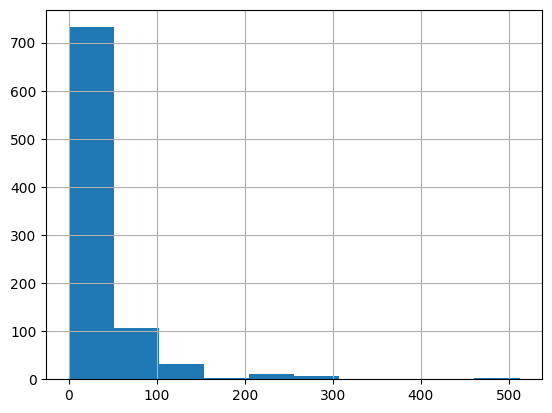

In [107]:
# Histograma
df_titanic["fare"].hist()

(2,)


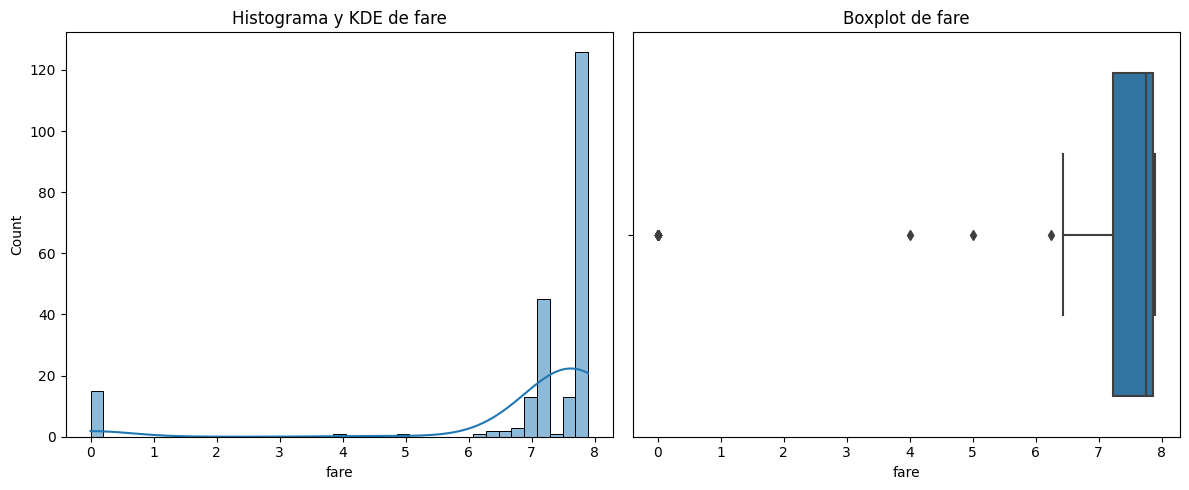

In [108]:
# Dado que hay mucho sesgo hacia la derecha, voy a dividirlo en varias partes para analizarlo mejor
# Para ver los valores anormales al inicio de la gráfica
q1 = df_titanic["fare"].quantile(0.25)

df_valores_superiores = df_titanic[df_titanic["fare"] <= q1]
plot_combined_graphs(df_valores_superiores,["fare"])


(2,)


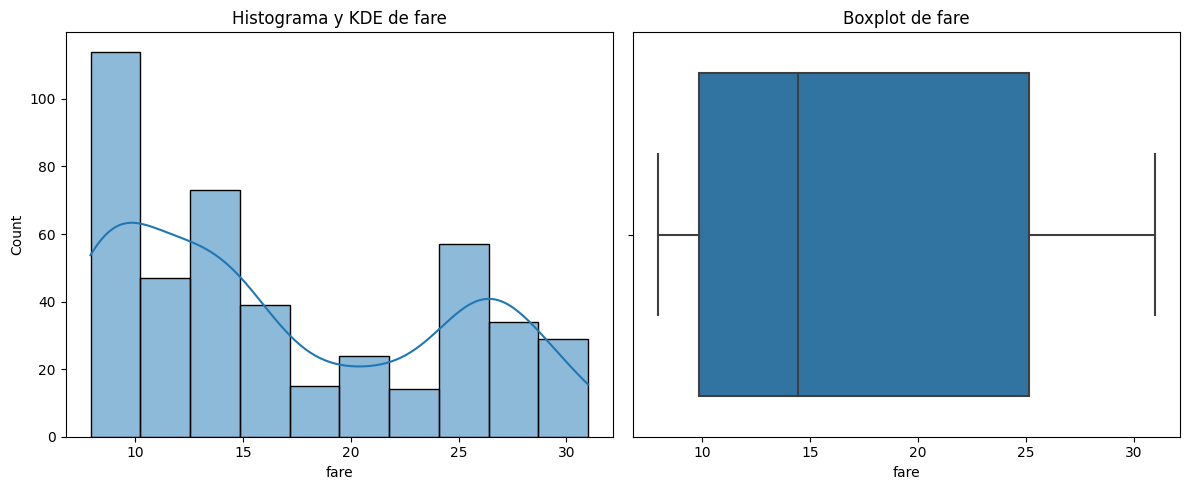

In [109]:
# Aquí estarían los valores más representativos
q2 = df_titanic["fare"].quantile(0.75)

df_valores_superiores = df_titanic[(df_titanic["fare"] > q1) & (df_titanic["fare"] <= q2)]
plot_combined_graphs(df_valores_superiores,["fare"])

(2,)


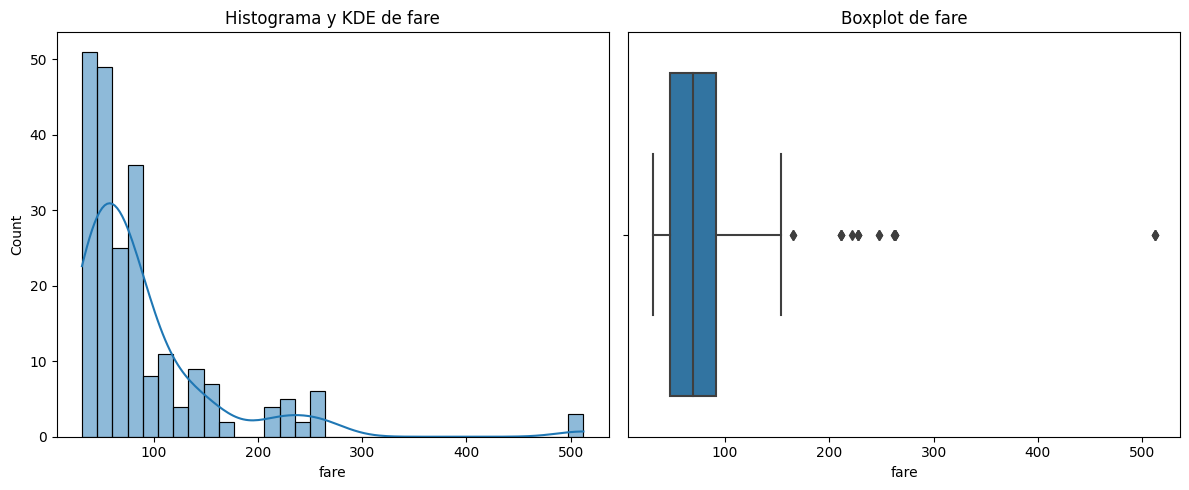

In [110]:
# Aquí se ven los valores anormales al final de la gráfica
df_valores_superiores = df_titanic[df_titanic["fare"] > q2]
plot_combined_graphs(df_valores_superiores,["fare"])


Primeras conclusiones:
- La media no es representativa de una medida central dado que la desviación típica es incluso mayor que ésta.
- El rango es muy alto dado que hay valores de más de 500 (dolares?)
- El 75% de los pasajeros abonó 31$ o menos
- Hubo gente que no pagó nada...
- Habría que planearse qué hacer con los valores tan extremos

___

#### Análisis variable: class
- Variable categórica que nos informa sobre la clase del billete del pasajero
- Variable considerada algo relevante de primeras de cara al estudio

In [111]:
# Frecuencia absoluta
df_titanic["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [112]:
# frecuenca relativa
(df_titanic["class"].value_counts()/df_titanic["class"].count()*100).round(2)

class
Third     55.11
First     24.24
Second    20.65
Name: count, dtype: float64

In [113]:
# Moda
df_titanic["class"].mode()

0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

<Axes: >

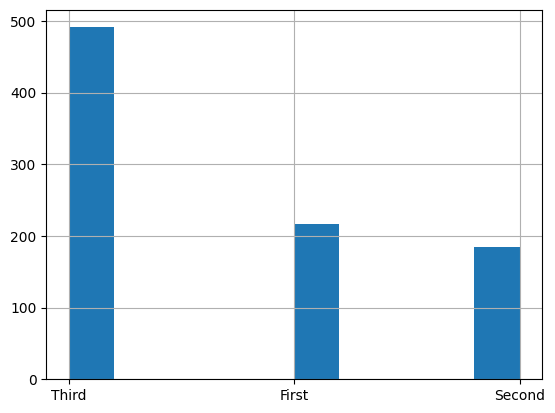

In [114]:
# Histograma
df_titanic["class"].hist()

Primeras conclusiones:
- La mitad de los pasajeros estaban en tercera clase
- Los pasajeros de primera clase, eran más numerosos que los de segunda.

Preguntas a responder:
- De qué tipo de billete se salvaron más personas? tuvo algo que ver ser de primera, segunda o tercera clase?

___

#### Análisis variable: embarked
- Variable categórica que nos informa sobre el puerto de embarque del pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).
- Variable considerada algo relevante de primeras de cara al estudio

In [115]:
# Frecuencia absoluta
df_titanic["embarked"].value_counts()

embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [116]:
# frecuenca relativa
(df_titanic["embarked"].value_counts()/df_titanic["embarked"].count()*100).round(2)

embarked
Southampton    72.44
Cherbourg      18.90
Queenstown      8.66
Name: count, dtype: float64

In [117]:
# Moda
df_titanic["embarked"].mode()

0    Southampton
Name: embarked, dtype: object

<Axes: >

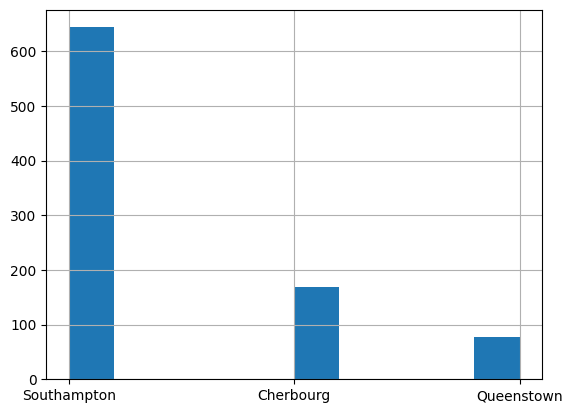

In [118]:
# Histograma
df_titanic["embarked"].hist()

Primeras conclusiones:
- Algo más del 70% de los pasajeros subieron en Southampon

Preguntas a responder:
- Dado que la mayoría de pasajeros se subieron en Southampon, se mantiene esta relación en cuanto a personas salvadas dependiendo de donde se subieron?

___

#### Análisis variable: alone
- Variable categórica que nos informa si el pasajero viajaba solo o no (True o False)
- Considerada algo relevante para el estudio final

In [119]:
# Frecuencia absoluta
df_titanic["alone"].value_counts()

alone
True     537
False    354
Name: count, dtype: int64

In [120]:
# frecuenca relativa
(df_titanic["alone"].value_counts()/df_titanic["alone"].count()*100).round(2)

alone
True     60.27
False    39.73
Name: count, dtype: float64

In [121]:
# Moda
df_titanic["alone"].mode()

0    True
Name: alone, dtype: bool

In [122]:
# Histograma. Al ser booleano no se puede sacar gráfico


Primeras conclusiones:
- El 60% de los pasajeros iba acompañado

Preguntas a responder:
- Se salvaron más personas que iban acompañadas que solas?

___

### #2.1 Categóricas

In [123]:
lista_categoricas = df_cardinalidad[df_cardinalidad["Tipo"]== "Categorica"].index.to_list()
lista_categoricas


['pclass', 'age', 'sibsp', 'embarked', 'class', 'who', 'embark_town']

In [124]:
print(len(df_titanic.columns))
print(len(df_cardinalidad))
df_titanic.columns

13
13


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

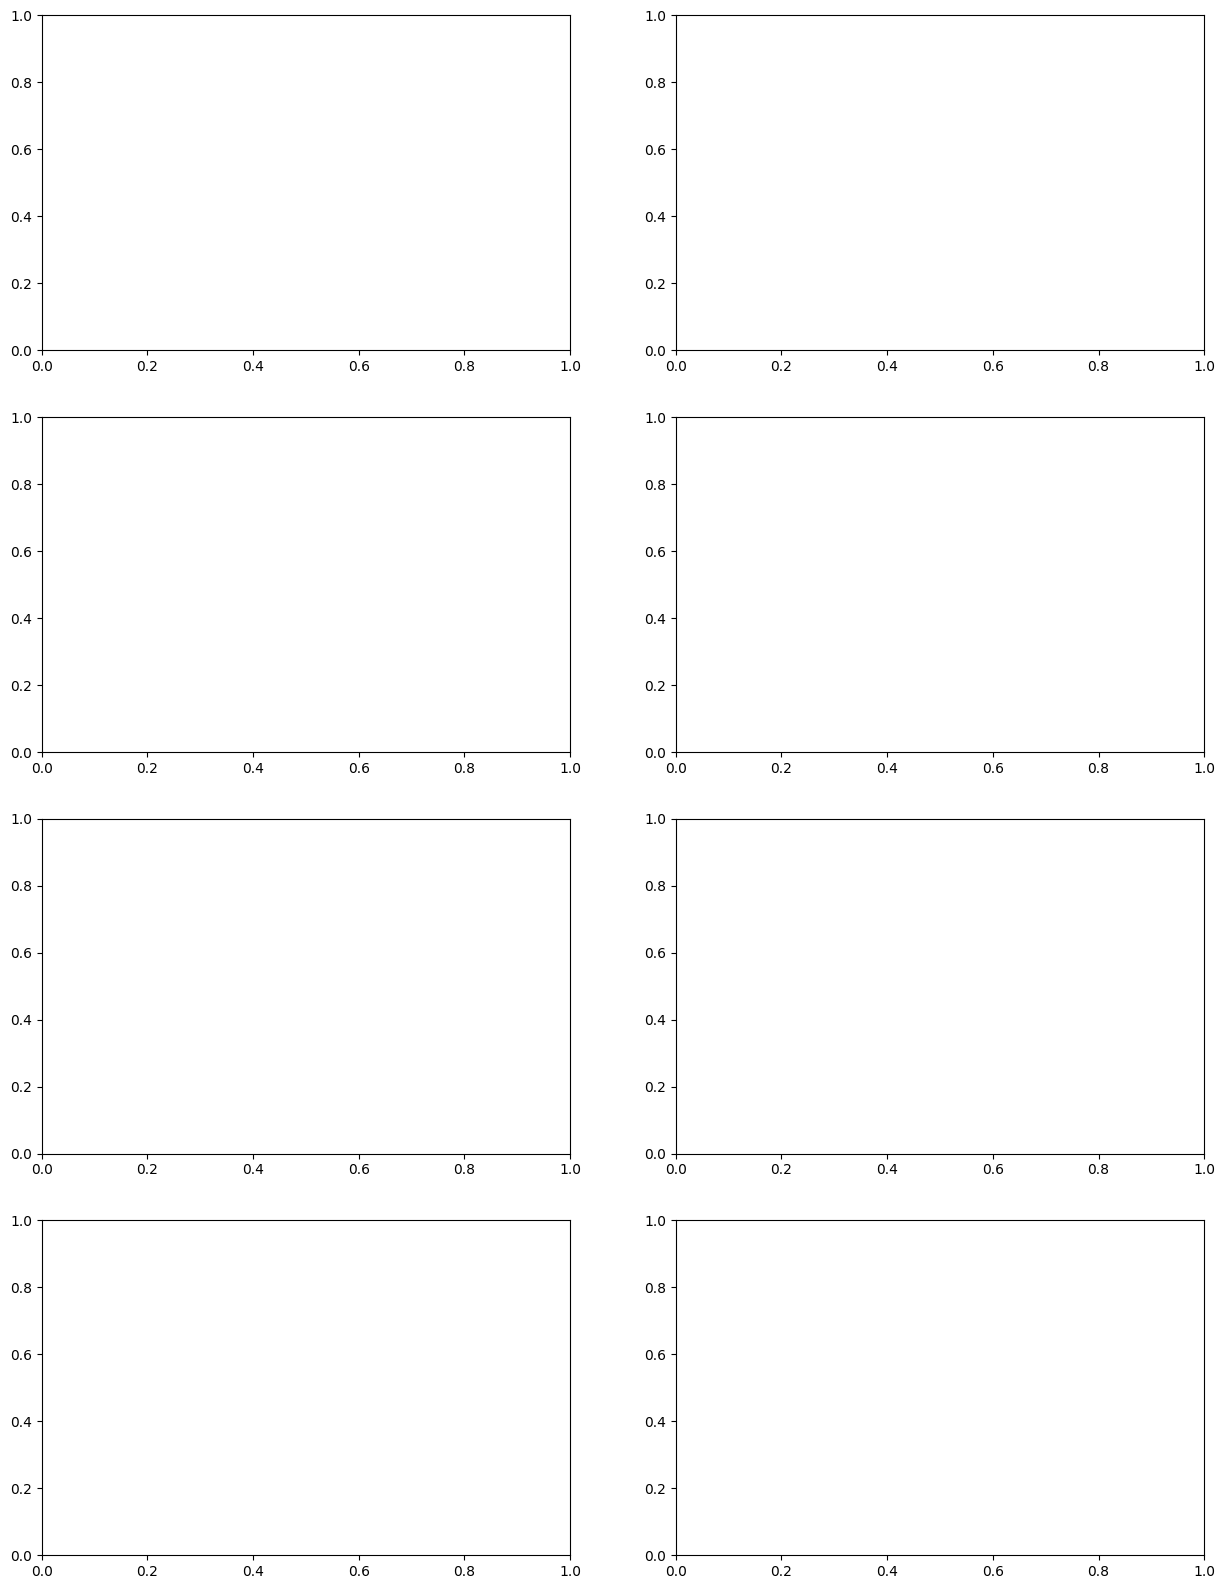

In [133]:
pinta_distribucion_categoricas(df_titanic,lista_categoricas)
# No me funciona esta función.... 

In [ ]:
df_titanic[lista_categoricas].mode().T

,0
pclass,3
sibsp,0
embarked,Southampton
class,Third
who,man
embark_town,Southampton


<Axes: >

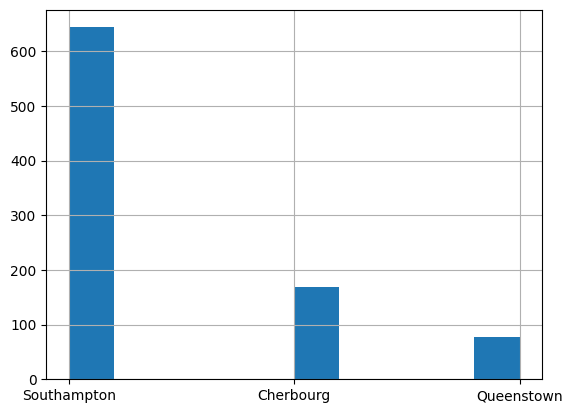

In [ ]:
df_titanic["embarked"].hist()

___

### #2.2 Numéricas

In [127]:
# Saco las columnas numércias y binarias que se utilizarán en la fórmula
lista_numericas = df_cardinalidad[(df_cardinalidad["Tipo"]== "Binaria") | (df_cardinalidad["Tipo"]=="Numerica Discreta")].index.to_list()
lista_numericas

['survived', 'sex', 'fare', 'adult_male', 'alive', 'alone']

(2, 2)


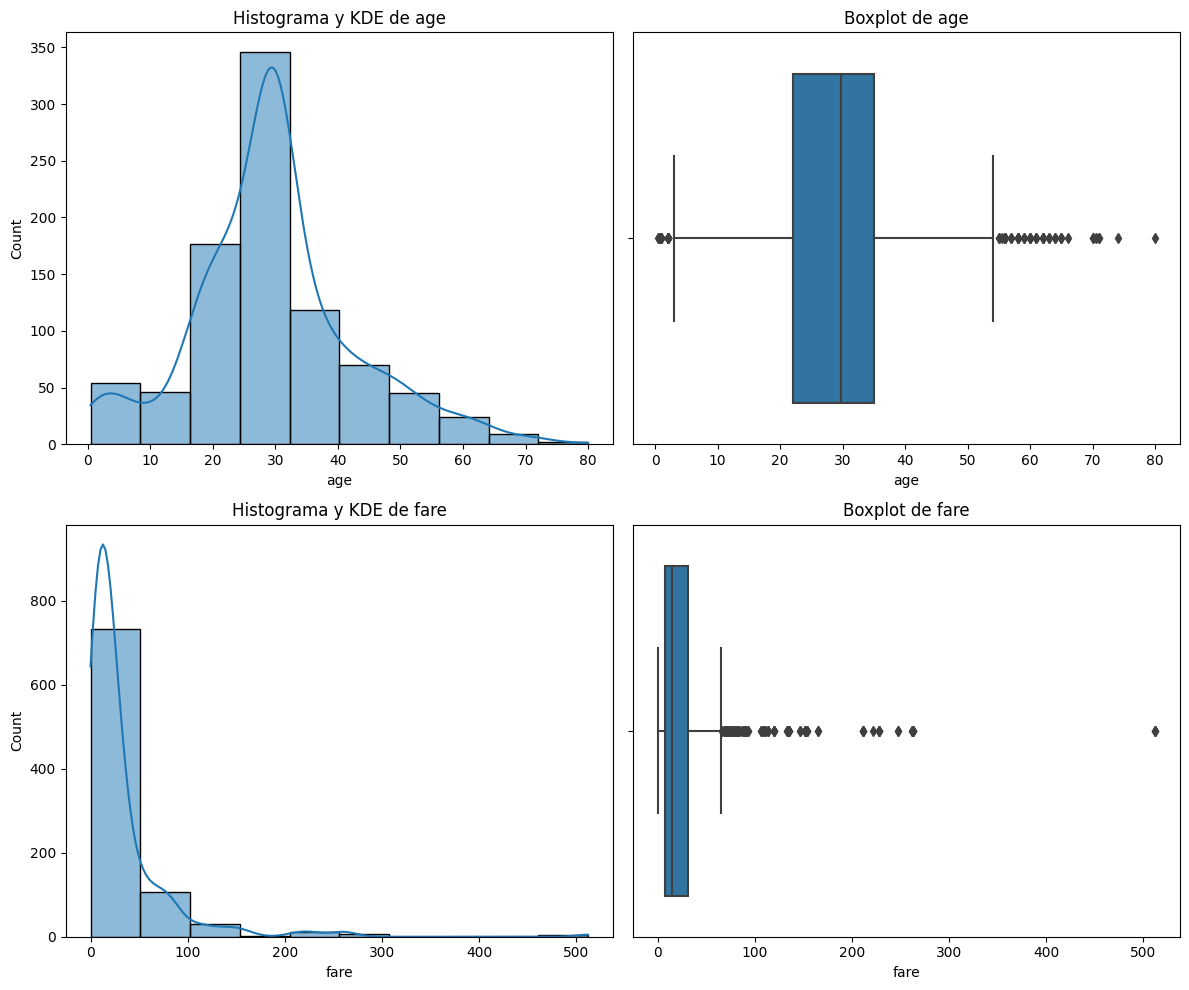

In [130]:
plot_combined_graphs(df_titanic,["age","fare"],bins=10)

#### Media, rangos ,maximo y mínimo 

In [ ]:
# Saco solo de las columnas "age" y "fare" ya que las otras no merece la pena.
df_titanic[["age","fare"]].describe().round(2)

,age,fare
count,891.00,891.00
mean,29.70,32.20
std,13.00,49.69
min,0.42,0.00
25%,22.00,7.91
50%,29.70,14.45
75%,35.00,31.00
max,80.00,512.33


#### Mediana "age" y "fare"

In [ ]:
df_titanic[["age","fare"]].describe().loc["50%"]

age     29.699118
fare    14.454200
Name: 50%, dtype: float64

#### Rangos variables "age" y "fare" 

In [ ]:
df_titanic[["age","fare"]].describe().loc["max"] - df_titanic[["age","fare"]].describe().loc["min"]

age      79.5800
fare    512.3292
dtype: float64

### Frecuencas absolutas numericas y binarias

In [ ]:
for var in lista_numericas:
    print(f"La frecuencia absoluta para {df_titanic[var].value_counts()}\n")

La frecuencia absoluta para survived
0    549
1    342
Name: count, dtype: int64

La frecuencia absoluta para sex
male      577
female    314
Name: count, dtype: int64

La frecuencia absoluta para age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

La frecuencia absoluta para fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

La frecuencia absoluta para adult_male
True     537
False    354
Name: count, dtype: int64

La frecuencia absoluta para alive
no     549
yes    342
Name: count, dtype: int64

La frecuencia absoluta para alone
True     537
False    354
Name: count, dtype: int64



In [ ]:
# Como no se ven todos los resultados, saco lo que no se ven:
# "Fare": frecuenca absoluta
df_titanic["fare"].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [ ]:
# "adult_male" frecuencia absoluta
df_titanic["adult_male"].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [ ]:
# "alive" frecuencia absoluta
df_titanic["alive"].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [ ]:
# "alone" frecuencia absoluta
df_titanic["alone"].value_counts()

alone
True     537
False    354
Name: count, dtype: int64

### Frecuencias numéricas y binarias relativas

In [ ]:
for var in lista_numericas:
    print(f"La frecuencia relativa para {df_titanic[var].value_counts()/df_titanic[var].count()*100}\n")

La frecuencia relativa para survived
0    61.616162
1    38.383838
Name: count, dtype: float64

La frecuencia relativa para sex
male      64.758698
female    35.241302
Name: count, dtype: float64

La frecuencia relativa para age
29.699118    19.865320
24.000000     3.367003
22.000000     3.030303
18.000000     2.918070
28.000000     2.805836
               ...    
36.500000     0.112233
55.500000     0.112233
0.920000      0.112233
23.500000     0.112233
74.000000     0.112233
Name: count, Length: 89, dtype: float64

La frecuencia relativa para fare
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
35.0000    0.112233
28.5000    0.112233
6.2375     0.112233
14.0000    0.112233
10.5167    0.112233
Name: count, Length: 248, dtype: float64

La frecuencia relativa para adult_male
True     60.26936
False    39.73064
Name: count, dtype: float64

La frecuencia relativa para alive
no     61.616162
yes    38.383838
Name: coun

In [ ]:
# "fare" frecuencia relativa
(df_titanic["fare"].value_counts()/df_titanic["fare"].count()*100).round(2)

fare
8.0500     4.83
13.0000    4.71
7.8958     4.26
7.7500     3.82
26.0000    3.48
           ... 
35.0000    0.11
28.5000    0.11
6.2375     0.11
14.0000    0.11
10.5167    0.11
Name: count, Length: 248, dtype: float64

In [ ]:
# "adult_male" frecuencia relativa
(df_titanic["adult_male"].value_counts()/df_titanic["adult_male"].count()*100).round(2)

adult_male
True     60.27
False    39.73
Name: count, dtype: float64

In [ ]:
# "alive" frecuencia relativa
(df_titanic["alive"].value_counts()/df_titanic["alive"].count()*100).round(2)

alive
no     61.62
yes    38.38
Name: count, dtype: float64

In [ ]:
# "alone" frecuencia relativa
(df_titanic["alone"].value_counts()/df_titanic["alone"].count()*100).round(2)

alone
True     60.27
False    39.73
Name: count, dtype: float64

___

### Relación entre variables.
Primera toma de contacto

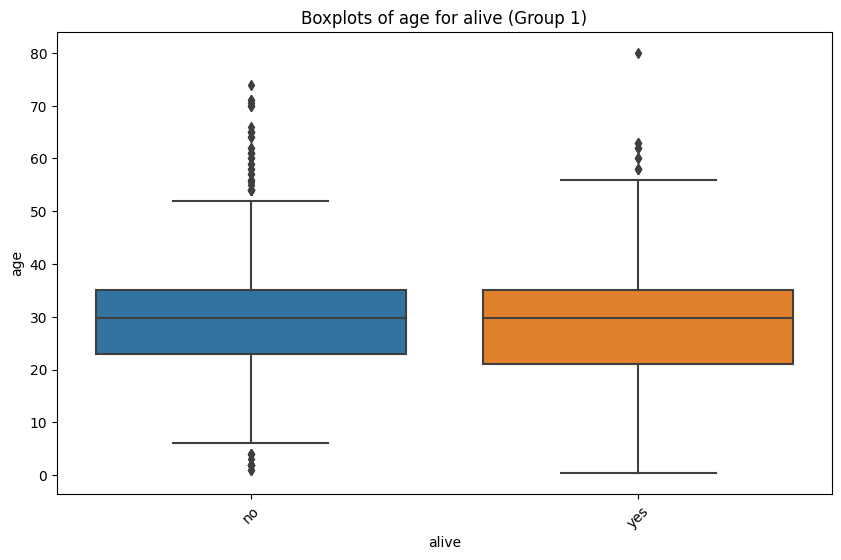

In [ ]:
plot_grouped_boxplots(df_titanic,"alive","age")

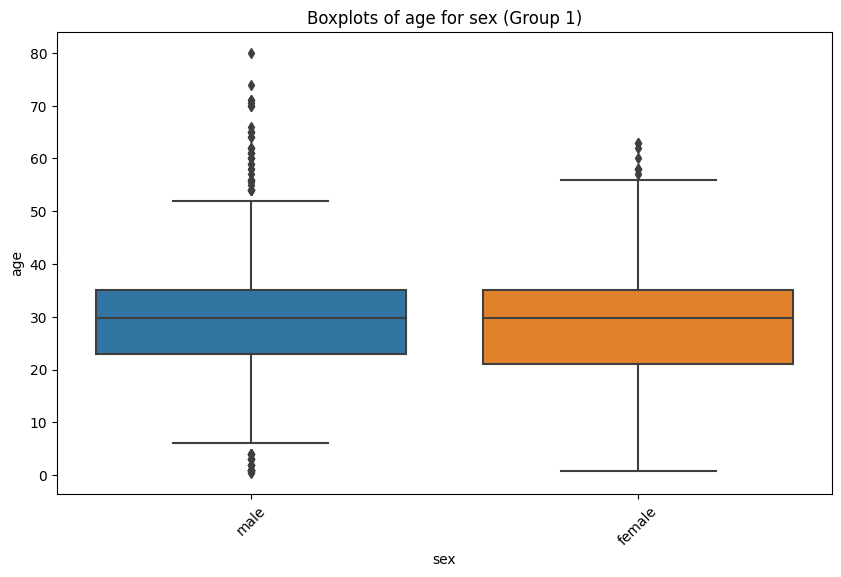

In [ ]:
plot_grouped_boxplots(df_titanic,"sex","age")

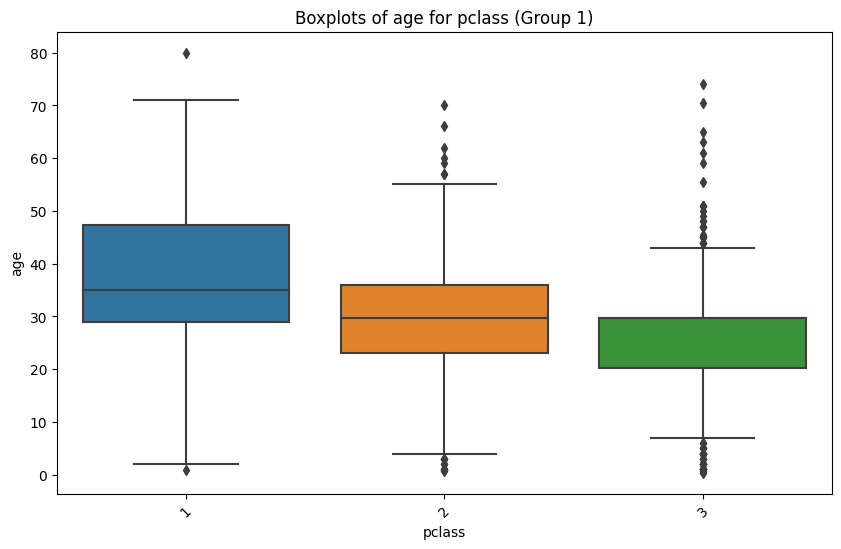

In [ ]:
plot_grouped_boxplots(df_titanic,"pclass","age")